![logo](figs/julia-logo-300.png)
# What's the hype all about?
A case for scientific computing with `Julia`

![history_julia](figs/history_julia.png)
<span style="font-size:0.5em;">zdnet.com</span>

### First release: 2012
### First stable release: 8 August 2018

![growth_metrics](figs/growth_metrics.png)
<span style="font-size:0.5em;">zdnet.com</span>

### Some perspective
![popularity_by_tutorial](figs/popularity_by_tutorial_search.png)
<span style="font-size:0.5em;">source:  http://pypl.github.io/PYPL.html</span>

# About Julialang...
|  | ![jeff](figs/jeff.png) | ![stefan](figs/stefan.png) | ![viral](figs/viral.png) | ![alan](figs/alan.png) |
|---------|---------|--------|-----------|----------|
| source | github | github | github | wikipedia |

![contributors](figs/contributors.png)


In [93]:
using HTTP

register_address = "https://raw.githubusercontent.com/JuliaRegistries/General/master/Registry.toml"
response = String(HTTP.request("GET", register_address).body);
num_packages = count(s -> occursin("{ name", s), split(response, '\n'))

print("As of this moment, there are ", num_packages,
      " many officially registered Julia packages...")

As of this moment, there are 2789 many officially registered Julia packages...

Check out https://juliaobserver.com/ for curated lists of trending/popular/new packages. Sort by category, popularity etc.

# What is Julia all about?

![motto](figs/motto_julia.png)
<span style="font-size:0.5em;">source: julialang.org</span>

![easy_to_use](figs/easy_to_use.png)
<span style="font-size:0.5em;">source: julialang.org</span>

![open_source](figs/open_source.png)
<span style="font-size:0.5em;">source: julialang.org</span>

# But how fast?---you ask...

### In extreme cases, petascale fast...
![petascale_descrip](figs/petascale_descrip.png)
<span style="font-size:0.5em;">source: wikipedia</span>
![patascale_example](figs/patascale_example.png)
<span style="font-size:0.5em;">source: wikipedia</span>

# Some benchmarks
![benchamrks](figs/benchmarks.svg)
<span style="font-size:0.5em;">source: https://julialang.org/benchmarks/</span>

In [94]:
# Let's look at recursive Fibonacci
function fibonacci(n::Int)
    @assert n >= 0
    n <= 1 && return n
    fibonacci(n-1) + fibonacci(n-2)
end

using BenchmarkTools
n = 25
@benchmark fibonacci(n) samples=100

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     837.119 μs (0.00% GC)
  median time:      925.184 μs (0.00% GC)
  mean time:        989.931 μs (0.00% GC)
  maximum time:     1.535 ms (0.00% GC)
  --------------
  samples:          100
  evals/sample:     1

In [97]:
@time fibonacci(n)

  0.000916 seconds (5 allocations: 176 bytes)


75025

In [103]:
# Let's approximate π using π = 4 Σₖ (-1)ᵏ⁺¹/(2k-1)
function gregory_series(n::Int)
    @assert n >= 0
    pi = 0.0
    s = -1.0
    for i in 1:n
        s *= -1.0
        pi += s/(2*i-1)
    end
    pi
end

n = Int(1e8)
@benchmark gregory_series(n) samples=5

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     446.689 ms (0.00% GC)
  median time:      451.639 ms (0.00% GC)
  mean time:        453.637 ms (0.00% GC)
  maximum time:     464.437 ms (0.00% GC)
  --------------
  samples:          5
  evals/sample:     1

In [106]:
@time gregory_series(n)

  0.453253 seconds (5 allocations: 176 bytes)


0.7853981608973315

In [14]:
# Just out of curiosity
π_hat = 4*gregory_series(Int(1e8))
print("The approximation error is: ", abs(π - π_hat))

The approximation error is: 1.0000467121074053e-8

# Importantly
Coding is as simple as it is with `python` or `R` or `Matlab` i.e. it **substantially** simpler than, say, with `C++`

### Characterisation of Julia
* **Multiple dispatch** paradigm

In [108]:
function modulus(x::Float64)
    print("Computing modulus of a float...\n")
    if x > 0.0
        return x
    else
        return -x
    end
end

modulus (generic function with 1 method)

In [109]:
function modulus(x::Complex)
    print("Computing modulus of a complex number...\n")
    sqrt(real(x)^2 + imag(x)^2)
end

modulus (generic function with 2 methods)

In [111]:
modulus(1.0)

Computing modulus of a float...


1.0

In [112]:
modulus(1.0+1.0im)

Computing modulus of a complex number...


1.4142135623730951

In [113]:
modulus(1//6)

MethodError: MethodError: no method matching modulus(::Rational{Int64})
Closest candidates are:
  modulus(!Matched::Float64) at In[109]:2
  modulus(!Matched::Complex) at In[110]:2

### Characterisation of Julia
* **Multiple dispatch** paradigm
* Dynamically typed

In [51]:
a = -3.0
print("\na=", a, " is a ", typeof(a), ", let's compute its modulus:\n"); print(modulus(a), "\n\n")
a = Complex(3.0, 4.0)
print("\nNow a=", a, " is a ", typeof(a), ", let's compute its modulus:\n"); print(modulus(a), "\n\n")
a = "Hello"
print("\nAnd now it is a string and it says: ", a, "\n\n")


a=-3.0 is a Float64, let's compute its modulus:
Computing modulus of a float...
3.0


Now a=3.0 + 4.0im is a Complex{Float64}, let's compute its modulus:
Computing modulus of a complex number...
5.0


And now it is a string and it says: Hello



### Characterisation of Julia
* **Multiple dispatch** paradigm
* Dynamically typed
* Highly optimised JIT compiler

#### Some additional benefits
* It is by design great for scientific computing with a thriving user community
* Easy to parallelise, also on GPUs
* Decent support for machine learning, statistics, data science
* Support for many database types, distributed SQL, Hadoop etc.
* Some nice visualisation tools

# So why Julia?
* Simple
* Fast
* Everything that is implemented for Julia is by default writted in Julia
* It has a growing scientific community

## Overview of the syntax
Highly encourage to check out
- [Julia by example (by Samuel Colvin)](https://juliabyexample.helpmanual.io/)
- [Julia by example (by Simon Danisch)](https://nextjournal.com/sdanisch/julia-by-example)
- [**Julia documentation**](https://docs.julialang.org/en/v1/manual/getting-started/)

The following overview will be based mainly on Julia documentation

### Variables

In [99]:
i_am_a_variable = 1

1

In [8]:
i_am_a_variable = "i am now a string"

"i am now a string"

In [10]:
δ, σ = 10, 15.0
print("δ: ", δ, ", typeof(δ): ", typeof(δ), ", σ: ", σ, ", typeof(σ): ", typeof(σ), ", δ + σ: ", δ + σ, ", typeof(δ + σ): ", typeof(δ + σ))

δ: 10, typeof(δ): Int64, σ: 15.0, typeof(σ): Float64, δ + σ: 25.0, typeof(δ + σ): Float64

In [21]:
println("value of π: ", Float64(π), "value of Euler const (\\euler): ", Float64(ℯ))
ℯ = 2.71 # try to redefine a constant

value of π: 3.141592653589793value of Euler const (\euler): 2.718281828459045


ErrorException: cannot assign a value to variable MathConstants.ℯ from module Main

Some other keywords that cannot be re-defined: `baremodule`, `begin`, `break`, `catch`, `const`, `continue`, `do`, `else`, `elseif`, `end`, `export`, `false`, `finally`, `for`, `function`, `global`, `if`, `import`, `let`, `local`, `macro`, `module`, `quote`, `return`, `struct`, `true`, `try`, `using`, `while`.

Usual, primitive numeric types: `Int8`, `UInt8`, `Int16`, `UInt16`, `Int32`, `UInt32`, `Int64`, `UInt64`, `Int128`, `UInt128`, `Bool`, `Float16`, `Float32`, `Float64`

Additionally: `Complex`, `Rational`, `BigInt`, `BigFloat`, `Inf`, `NaN`

Maths operations have a usual syntax (with ^ denoting power):

In [34]:
x = 2
(x-1)*3^2 + (x^x-1)/2 - 0.2

10.3

### Arrays and broadcasting

In [6]:
v = [1,2,3]
v .* 3.0 # `.` is a broadcast operator, equivalent to [1*3.0, 2*3.0, 3*3.0]

3-element Array{Float64,1}:
 3.0
 6.0
 9.0

In [7]:
v .== 1 # !=, <, >, <=, >=

3-element BitArray{1}:
 1
 0
 0

In [8]:
isequal.(v, 2)

3-element BitArray{1}:
 0
 1
 0

In [9]:
v .+ v

3-element Array{Int64,1}:
 2
 4
 6

In [10]:
using LinearAlgebra
m = [1.0 2.0; -1.0 3.0] # stores in column major order

2×2 Array{Float64,2}:
  1.0  2.0
 -1.0  3.0

In [11]:
display.([inv(m), m+m', det(m+m'), m\[1.0, 1.0], inv(m)*[1.0, 1.0], cholesky(m+m'), norm(m, 1)])
print() # don't mind me

2×2 Array{Float64,2}:
 0.6  -0.4
 0.2   0.2

2×2 Array{Float64,2}:
 2.0  1.0
 1.0  6.0

11.0

2-element Array{Float64,1}:
 0.19999999999999996
 0.4                

2-element Array{Float64,1}:
 0.19999999999999996
 0.4                

Cholesky{Float64,Array{Float64,2}}
U factor:
2×2 UpperTriangular{Float64,Array{Float64,2}}:
 1.41421  0.707107
  ⋅       2.34521 

7.0

This is a VERY extensive package, with a tonne of optimized algorithms... https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/

In [12]:
m

2×2 Array{Float64,2}:
  1.0  2.0
 -1.0  3.0

In [13]:
m[1,1], m[1,2], m[2,1], m[2,2]

(1.0, 2.0, -1.0, 3.0)

In [14]:
m[1,1] = -0.001
m[2] = 10 # remember column major!
m[:,2] .= 0.0 # broadcasting assignment operation
m

2×2 Array{Float64,2}:
 -0.001  0.0
 10.0    0.0

### Tuples, dictionaries

In [15]:
tup = (1, "MPI", 0.3+0.2im, [1.0, 2.0])

(1, "MPI", 0.3 + 0.2im, [1.0, 2.0])

In [16]:
tup[1] = 1.0

MethodError: MethodError: no method matching setindex!(::Tuple{Int64,String,Complex{Float64},Array{Float64,1}}, ::Float64, ::Int64)

In [17]:
tup[4][1] = 10
tup

(1, "MPI", 0.3 + 0.2im, [10.0, 2.0])

In [18]:
dict = Dict("A"=>1, "B"=>2)

Dict{String,Int64} with 2 entries:
  "B" => 2
  "A" => 1

In [19]:
dict["A"], keys(dict), values(dict)

(1, ["B", "A"], [2, 1])

In [20]:
dict["B"] = 100
dict

Dict{String,Int64} with 2 entries:
  "B" => 100
  "A" => 1

### Functions

In [21]:
function add(x, y)
    x + y
end
subtract(x,y) = x-y
add(2,3), subtract(10,8)

(5, 2)

In [22]:
new_subtract = subtract
new_subtract(5,3)

2

In [23]:
drift(x) = -0.5*x
increment(x, g) = x + g(x)
println("the first evaluation: ", increment(3.0, drift)) # 3.0 + (-0.5*3.0)

# and passing anonymous functions
println("the second evaluation: ", increment(3.0, x->2.0*x)) # 3.0 + (2.0*3.0)

the first evaluation: 1.5
the second evaluation: 9.0


In [24]:
function l2_dist(x::Vector{Float64}, y::Vector{Float64})::Float64
    return sqrt(sum((x .- y).^2))
    println("this will never be printed because after return...")
end
l2_dist([1.0, 2.0], [2.0, 3.0])

1.4142135623730951

In [25]:
l2_dist([1, 2], [2.0, 3.0])

MethodError: MethodError: no method matching l2_dist(::Array{Int64,1}, ::Array{Float64,1})
Closest candidates are:
  l2_dist(!Matched::Array{Float64,1}, ::Array{Float64,1}) at In[24]:2

In [26]:
foo(x::Float64) = 10
foo(x::Int64) = true
foo(10), foo.((1.0, 10)), map(foo, (1.0, 10))

(true, (10, true), (10, true))

In [27]:
# default values
default_increm(x, y=1) = x+y
default_increm(10), default_increm(10,2)

(11, 12)

In [28]:
# variable length
function alter_sum(args...)
    total = 0.0
    s = -1.0
    for arg in args
        s = -s
        total += s*arg
    end
    total
end
alter_sum(10), alter_sum(10, 10),
alter_sum(10, 10, 1.0, 2.0, 3.0)

(10.0, 0.0, 2.0)

In [29]:
# keyword arguments, variable length keyword arguments
function disp_prod(produce; cost="free", kwargs...)
    println(produce, ": ", cost)
    for key in keys(kwargs)
        println(key, ": ", kwargs[key])
    end
end

disp_prod("apples")
println("And another call...")
disp_prod("apples", cost="€2.00",
          bananas="€1.00", oranges="€2.50")

apples: free
And another call...
apples: €2.00
bananas: €1.00
oranges: €2.50


### Control Flow

In [30]:
function compare(x, y)
    if x < y
        println("$(x) is less than $(y)")
    elseif x > y
        println("$(x) is greater than $(y)")
    else
        println("$(x) is equal to $(y)")
    end
end
compare(10, 12)
compare(12, 10)
compare(10, 10)

10 is less than 12
12 is greater than 10
10 is equal to 10


In [31]:
function compare_short(x, y)
    results = ["less than", "greater than or equal to"]
    result = (x < y ? results[1] : results[2])
    println("$(x) is ", result, " $(y)")
end
compare_short(10, 12)
compare_short(12, 10)

10 is less than 12
12 is greater than or equal to 10


In [32]:
function sqare_root(x::Number)
    # often && is used as well
    typeof(x) <: Complex || x >= 0 || error("x must be positive or Complex")
    sqrt(x)
end

println("√9: ", sqare_root(9), "\n√-1: ", sqare_root(-1.0+0.0im))
sqare_root(-1.0)

√9: 3.0
√-1: 0.0 + 1.0im


ErrorException: x must be positive or Complex

In [33]:
using Distributions
function unif_on_circle(;radius=1.0)
    while true
        draw_on_a_square = rand(Uniform(-radius, radius), 2)
        norm(draw_on_a_square, 2) < radius && return draw_on_a_square
    end
end

unif_on_circle (generic function with 1 method)

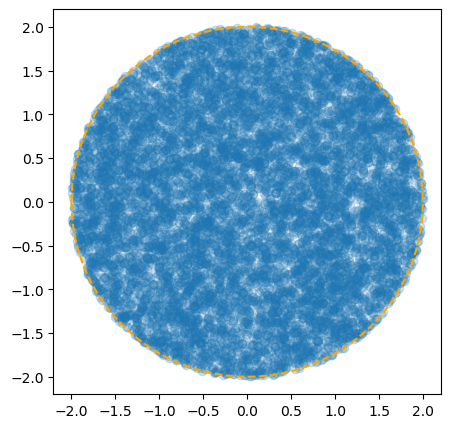

In [34]:
using PyPlot
r = 2.0
some_draws = hcat([unif_on_circle(radius=r) for i in 1:1e4]...)
fig, ax = subplots(1, figsize=(5,5))
ax.scatter(some_draws[1,:], some_draws[2,:], alpha=0.2) # plot the draws
xaxis, semi_circle = -r:0.01:r, (@. sqrt(r^2 - (-r:0.01:r)^2))
ax.plot(xaxis, semi_circle, color="orange", linestyle="dashed") # plot the upper semi-circle
ax.plot(xaxis, -semi_circle, color="orange", linestyle="dashed") # plot the lower semi-circle
show()

More conventionally...

In [35]:
begin
    counter = 0
    while counter < 5
        counter += 1
    end
    println("now the counter is $(counter)")
end

now the counter is 5


In [36]:
counter = 0
while counter < 10
    counter += 1
    if counter == 4
        break
    end
end
println("now the counter is $(counter)")

LoadError: syntax: incomplete: "while" at none:1 requires end

In [37]:
v = [1, 2, 3, 4]
for element in v
    println("element: ", element)
    element = 10
end
println("notice that passed by value, as v is: ", v)

element: 1
element: 2
element: 3
element: 4
notice that passed by value, as v is: [1, 2, 3, 4]


In [38]:
function factorial(n::Integer)
    n == 0 && return 1
    n <= 0 && error("n must be positive...")
    x = 1
    for i=1:n
        x *= i
    end
    x
end
factorial(0), factorial(3), factorial(10)

(1, 6, 3628800)

### Types & methods
use of `::` operator

In [39]:
(2+2)::Int64 # assertion

4

In [40]:
abstract type Object end
abstract type GeomObject <: Object end

Integer <: Number

true

In [41]:
struct Point2D <: GeomObject
    x::Float64
    y::Float64
end

struct Point <: GeomObject
    x::Vector{Float64}
    
    Point(x::Number) = new([Float64(x)])
    Point(x::Vector) = new(Float64.(x))
end
points = Point2D(3,4), Point(0), Point([1,2,3])

(Point2D(3.0, 4.0), Point([0.0]), Point([1.0, 2.0, 3.0]))

In [42]:
dim(p::Point2D) = 2
dim(p::Point) = length(p.x)

dim.(points)

(2, 1, 3)

In [43]:
import LinearAlgebra: norm
norm(p::Point2D, q::Real=2) = norm([p.x, p.y], q)
norm(p::Point, q::Real=2) = norm(p.x, q)
norm.(points, 1), norm.(points, Inf)

((7.0, 0.0, 6.0), (4.0, 0.0, 3.0))

In [44]:
# Type Unions:
dist_from_origin(p::Union{Point2D, Point}) = norm(p, 2)
dist_from_origin.(points)

(5.0, 0.0, 3.7416573867739413)

In [45]:
# notice that structs are immutable:
points[1].x = 10

ErrorException: setfield! immutable struct of type Point2D cannot be changed

In [46]:
# but there are mutable structs:
mutable struct MPoint2D <: GeomObject
    x::Float64
    y::Float64
end
p = MPoint2D(3.0, 4.0)
println("Mutable point: ", p)
p.x = 10
println("It is now: ", p)

Mutable point: MPoint2D(3.0, 4.0)
It is now: MPoint2D(10.0, 4.0)


### Parametric types
Analog to templates, a very powerful concept!

In [73]:
struct BrownianMotion{T} <: GeomObject
    time::Vector{Float64}
    path::Vector{T}
    function BrownianMotion(time, x0::T) where T
        path = repeat([x0], length(time))
        sample_bm!(time, path)
        new{T}(time, path)
    end
end

function sample_bm!(time, path)
    for i in 2:length(path)
        x = path[i-1]
        dt = time[i]-time[i-1]
        path[i] = x + sqrt(dt)*randn(typeof(x))
    end
end

using StaticArrays
real_BM = BrownianMotion(0.0:0.01:1.0, 0.0)
complex_BM = BrownianMotion(0.0:0.01:1.0, 0.0+0.0im)
multidim_BM = BrownianMotion(0.0:0.01:1.0, @SVector zeros(5))
multidim_complex_BM = BrownianMotion(0.0:0.01:1.0, @SVector zeros(Complex{Float64}, 3))
print() # don't mind me

There is **much, much** more to `Julia`
* more advance uses of what I've shown
* mutliple other functionalities, some of them very elaborate
* a very broad list of standard maths functions and algorithms that are implemented in Julia
* little tricks that simplify programmer's life and many others
(see https://docs.julialang.org/en/v1/ for a comprehensive overview)

**But** these more advance techniques **are not essential** to start programming with `Julia` and benefit from many existing packages...

Best way is to start and practice...

And know how to use `google`, `stackoverflow`, `stackexchange`, `Slack`...

# Universe of Julia packages
* It's vast...
* You can combine packages with one another to generate code on the fly and obtain new use cases
* Everything is written in Julia, so very easy to modify to your needs...

Of course, standard packages, such as:
* Distributions.jl
* LinearAlgebra.jl
* Profile.jl
* DelimitedFiles.jl
* CSV.jl
* DataFrames.jl
* Optim.jl
* and many others...

To install new a package either write:

In [91]:
using Pkg
package_name = "Distributions"
Pkg.add(package_name)
# now we can use it:
using Distributions, Random
Random.seed!(42)
rand(Exponential(3.0))

 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]


2.41927450573826

or use a package environment accessed via `]`, i.e. write `] add Distributions`, I think this cannot be done via jupyter notebooks

[DifferentialEquations.jl](https://docs.juliadiffeq.org/latest/)
![diff_eqns](figs/diff_eqns.png)
<span style="font-size:0.5em;">https://github.com/JuliaDiffEq/DifferentialEquations.jl</span>

| ![flux](figs/flux.png) | ![zygote](figs/zygote.png) |
|---------|--------|
| [Flux.jl](https://fluxml.ai/) | [zygote.jl](https://github.com/FluxML/Zygote.jl) |

![dynamicalsystems](figs/dynamicalsystems_logo.gif)
[DynamicalSystems.jl](https://juliadynamics.github.io/DynamicalSystems.jl/latest/)

![jump-logo-with-text](figs/jump-logo-with-text.svg)
[JuMP.jl](http://www.juliaopt.org/JuMP.jl/v0.19.1/)
![what_jump_does](figs/what_jump_does.png)



[Makie.jl](https://github.com/JuliaPlots/Makie.jl)

| ![fhn](figs/fhn.gif) | ![complex](figs/complex_makie.gif) |
|---------|---------|
| https://github.com/mmider/BridgeSDEInference.jl | https://github.com/JuliaPlots/Makie.jl |

* Wrappers around other languages/libraries from other languages: [PyCall.jl](https://github.com/JuliaPy/PyCall.jl), [Cxx.jl](https://github.com/JuliaInterop/Cxx.jl), [JavaCall.jl](https://github.com/JuliaInterop/JavaCall.jl), [MATLAB.jl](https://github.com/JuliaInterop/MATLAB.jl), [Mathematica.jl](https://github.com/JuliaInterop/Mathematica.jl), [TensorFlow.jl](https://github.com/malmaud/TensorFlow.jl), [ScikitLearn.jl](https://github.com/cstjean/ScikitLearn.jl)
* Optimization: [Optim.jl](https://github.com/JuliaNLSolvers/Optim.jl)
* Standard plotting libraries: [PyPlot.jl](https://github.com/JuliaPy/PyPlot.jl) [Gadfly.jl](https://github.com/GiovineItalia/Gadfly.jl)
* Automatic differentiation [ForwardDiff.jl](https://github.com/JuliaDiff/ForwardDiff.jl), [ReverseDiff.jl](https://github.com/JuliaDiff/ReverseDiff.jl)
* Working with databases: see [JuliaDatabases](https://github.com/JuliaDatabases) environment or Julia-specific database [JuliaDB.jl](https://github.com/JuliaComputing/JuliaDB.jl)
* Generic Markov Chain Monte Carlo [Mamba.jl](https://github.com/brian-j-smith/Mamba.jl)
* GPU computing [CuArrays.jl](https://github.com/JuliaGPU/CuArrays.jl)
* For graphs and networks: [Graphs.jl](https://github.com/JuliaGraphs/LightGraphs.jl) and more generally the environment [JuliaGraphs](https://github.com/JuliaGraphs/LightGraphs.jl)
* Some packages for manifolds: [Manopt.jl](https://www.manoptjl.org/stable/), [Manifolds.jl](https://github.com/JuliaNLSolvers/Manifolds.jl)
* and about `2800` more...

### Thank you for your attention!